Artificial Intelligence

1. Using any CSP (Constraint Satisfaction Problem) framework (using variables, value domains, and constraints), discover if the above problems can be solved and if so detail who would be in hired.

In [1]:
# Installs the constraint package onto the notebook.
# !pip install python-constraint

from constraint import *
from collections import Counter

# Candidates and their abilities, excluding Ciara as she will be already included as a python programmer in all combinations.
candidates = {
    "Peter": ["Python", "AI"],
    "Juan": ["Web", "AI"],
    "Jim": ["AI", "Systems"],
    "Jane": ["Python", "Database"],
    "Mary": ["Web", "Systems"],
    "Bruce": ["Systems", "Python"],
    "Anita": ["Web", "AI"],
}

# Scenario 1

problem1 = Problem()

# Defines roles with specific counts.
roles1 = ["Python Programmer 1", "Python Programmer 2", "AI Engineer 1", "AI Engineer 2", 
          "Web Designer", "Database Admin", "Systems Engineer"]

# Adding variables for each role.
for role in roles1:
    skill = role.split()[0]  # Splitting to get the skill part of the role.
    problem1.addVariable(role, [candidate for candidate, abilities in candidates.items() if skill in abilities])

# Ciara fills one Python Programmer role.
problem1.addConstraint(lambda pp1, pp2: "Ciara" in [pp1, pp2], ["Python Programmer 1", "Python Programmer 2"])

# Constraint for different candidates.
problem1.addConstraint(AllDifferentConstraint(), roles1)

solution1 = problem1.getSolutions()

print("There are " + str(len(solution1)) + " solutions for Scenario 1.")
for solution in solution1:
    print(solution)

# Scenario 2

# Candidates and their abilities, Ciara and Juan are not in the list as Ciara will always be considered a Python Programmer while Juan will always be considered a Web Designer AND an AI Engineer.
candidates = {
    "Peter": ["Python", "AI"],
    "Jim": ["AI", "Systems"],
    "Jane": ["Python", "Database"],
    "Mary": ["Web", "Systems"],
    "Bruce": ["Systems", "Python"],
    "Anita": ["Web", "AI"],
}

# Defines roles with specific counts.
roles = ["Python Programmer", "AI Engineer 1", "AI Engineer 2", "Database Admin", "Systems Engineer"]

problem = Problem()

# Adding variables for each role.
for role in roles:
    skill = role.split()[0]  # Splitting to get the skill part of the role.
    problem.addVariable(role, [candidate for candidate, abilities in candidates.items() if skill in abilities])

# Constraint to ensure that a person is not assigned to more than two roles and not the same role twice.
def valid_assignment(*assigned_roles):
    role_count = Counter(assigned_roles)
    for candidate, count in role_count.items():
        if count > 2:
            return False
        if count == 2:
            assigned_positions = [role for role, person in zip(roles, assigned_roles) if person == candidate]
            if assigned_positions[0].split()[0] == assigned_positions[1].split()[0]:  # Checks if roles are different.
                return False
    return True

problem.addConstraint(valid_assignment, roles)

# Constraint to ensure that no more than four individuals are employed.
def max_four_individuals(*assigned_roles):
    return len(set(assigned_roles)) <= 4

problem.addConstraint(max_four_individuals, roles)

# Constraint to ensure alphabetical order for the AI Engineer positions, avoiding duplicated solutions.
def order_roles(ai_engineer_1, ai_engineer_2):
    return ai_engineer_1 < ai_engineer_2

problem.addConstraint(order_roles, ["AI Engineer 1", "AI Engineer 2"])


# Solving the problem.
solution2 = problem.getSolutions()

# Counting and printing the solutions.
print("There are " + str(len(solution2)) + " solutions for scenario 2 to employ 4 people for the required roles left (counting that Ciara is one of the Python Programmers and Juan is the Web Designer and one of the AI Engineers).\n")
for i, solution in enumerate(solution2, 1):
    print(f"Solution {i}: {solution}")

There are 0 solutions for Scenario 1.
There are 21 solutions for scenario 2 to employ 4 people for the required roles left (counting that Ciara is one of the Python Programmers and Juan is the Web Designer and one of the AI Engineers).

Solution 1: {'AI Engineer 1': 'Anita', 'AI Engineer 2': 'Jim', 'Database Admin': 'Jane', 'Python Programmer': 'Bruce', 'Systems Engineer': 'Bruce'}
Solution 2: {'AI Engineer 1': 'Anita', 'AI Engineer 2': 'Jim', 'Database Admin': 'Jane', 'Python Programmer': 'Bruce', 'Systems Engineer': 'Jim'}
Solution 3: {'AI Engineer 1': 'Anita', 'AI Engineer 2': 'Jim', 'Database Admin': 'Jane', 'Python Programmer': 'Jane', 'Systems Engineer': 'Mary'}
Solution 4: {'AI Engineer 1': 'Anita', 'AI Engineer 2': 'Jim', 'Database Admin': 'Jane', 'Python Programmer': 'Jane', 'Systems Engineer': 'Bruce'}
Solution 5: {'AI Engineer 1': 'Anita', 'AI Engineer 2': 'Jim', 'Database Admin': 'Jane', 'Python Programmer': 'Jane', 'Systems Engineer': 'Jim'}
Solution 6: {'AI Engineer 1': '

3. These problems be solved using several other algorithm’s we have studied in the module. Choose one of these algorithms and discuss your answer in detail including a proof of your hypothesis in code.

In [2]:
# Scenario 1

from itertools import *

# Checks if a candidate is suitable for a role.
def is_suitable(candidate, role, candidates):
    skill = role.split()[0]
    return skill in candidates[candidate]

# Generates all possible combinations of candidates for each role.
def generate_combinations(roles, candidates):
    return product(*(combinations([candidate for candidate in candidates if is_suitable(candidate, role, candidates)], 1) for role in roles))


candidates = {
    "Ciara": ["Python"], # Ciara is included as a Python programmer
    "Peter": ["Python", "AI"],
    "Juan": ["Web", "AI"],
    "Jim": ["AI", "Systems"],
    "Jane": ["Python", "Database"],
    "Mary": ["Web", "Systems"],
    "Bruce": ["Systems", "Python"],
    "Anita": ["Web", "AI"],
}

roles1 = ["Python Programmer 1", "Python Programmer 2", "AI Engineer 1", "AI Engineer 2", 
          "Web Designer", "Database Admin", "Systems Engineer"]

# Filtering the combinations to meet the constraints.
solutions1 = []
for combination in generate_combinations(roles1, candidates):
    flattened_comb = sum(combination, ())
    candidate_count = {candidate: flattened_comb.count(candidate) for candidate in set(flattened_comb)}
    
    # Checks if Ciara is included and no more than 3 individuals are employed.
    if 'Ciara' in candidate_count and len(candidate_count) <= 3:
        # Checks if no individual is assigned more than two roles.
        if all(count <= 2 for count in candidate_count.values()):
            solutions1.append(combination)

print("There are " + str(len(solutions1)) + " solutions for Scenario 1.")

There are 0 solutions for Scenario 1.


In [3]:
# Scenario 2

from itertools import combinations, product
from collections import Counter

# Candidates and their abilities, Ciara and Juan are not in the list as Ciara will always be considered a Python Programmer while Juan will always be considered a Web Designer AND an AI Engineer.
candidates = {
    "Peter": ["Python", "AI"],
    "Jim": ["AI", "Systems"],
    "Jane": ["Python", "Database"],
    "Mary": ["Web", "Systems"],
    "Bruce": ["Systems", "Python"],
    "Anita": ["Web", "AI"],
}

# Defines roles with specific counts.
roles = ["Python Programmer", "AI Engineer 1", "AI Engineer 2", "Database Admin", "Systems Engineer"]

# Mapping roles to required skills.
role_skills = {
    "Python Programmer": "Python",
    "AI Engineer 1": "AI",
    "AI Engineer 2": "AI",
    "Database Admin": "Database",
    "Systems Engineer": "Systems"
}

# Generates all possible combinations of candidates for the roles.
all_combinations = product(*[candidates.keys() for _ in roles])

def is_valid_assignment(combination):
    # Checks if candidates have the required skills for their roles.
    for role, candidate in zip(roles, combination):
        if role_skills[role] not in candidates[candidate]:
            return False

    # Creatse a counter for the number of roles assigned to each candidate.
    role_count = Counter(combination)

    # Checks for the constraint of at most two roles per person.
    if any(count > 2 for count in role_count.values()):
        return False

    # Checks if more than four individuals are employed.
    if len(set(combination)) > 4:
        return False

    # Checks for alphabetical order in AI Engineer roles.
    if combination[roles.index("AI Engineer 1")] >= combination[roles.index("AI Engineer 2")]:
        return False

    return True

# Filters combinations based on constraints.
valid_solutions = [comb for comb in all_combinations if is_valid_assignment(comb)]

# Counting and printing the solutions.
print("There are " + str(len(valid_solutions)) + " valid solutions for scenario 2.\n")
for i, solution in enumerate(valid_solutions, 1):
    print(f"Solution {i}: {dict(zip(roles, solution))}")


There are 21 valid solutions for scenario 2.

Solution 1: {'Python Programmer': 'Peter', 'AI Engineer 1': 'Jim', 'AI Engineer 2': 'Peter', 'Database Admin': 'Jane', 'Systems Engineer': 'Jim'}
Solution 2: {'Python Programmer': 'Peter', 'AI Engineer 1': 'Jim', 'AI Engineer 2': 'Peter', 'Database Admin': 'Jane', 'Systems Engineer': 'Mary'}
Solution 3: {'Python Programmer': 'Peter', 'AI Engineer 1': 'Jim', 'AI Engineer 2': 'Peter', 'Database Admin': 'Jane', 'Systems Engineer': 'Bruce'}
Solution 4: {'Python Programmer': 'Peter', 'AI Engineer 1': 'Anita', 'AI Engineer 2': 'Peter', 'Database Admin': 'Jane', 'Systems Engineer': 'Jim'}
Solution 5: {'Python Programmer': 'Peter', 'AI Engineer 1': 'Anita', 'AI Engineer 2': 'Peter', 'Database Admin': 'Jane', 'Systems Engineer': 'Mary'}
Solution 6: {'Python Programmer': 'Peter', 'AI Engineer 1': 'Anita', 'AI Engineer 2': 'Peter', 'Database Admin': 'Jane', 'Systems Engineer': 'Bruce'}
Solution 7: {'Python Programmer': 'Peter', 'AI Engineer 1': 'Anita

Data Visualization & Comms

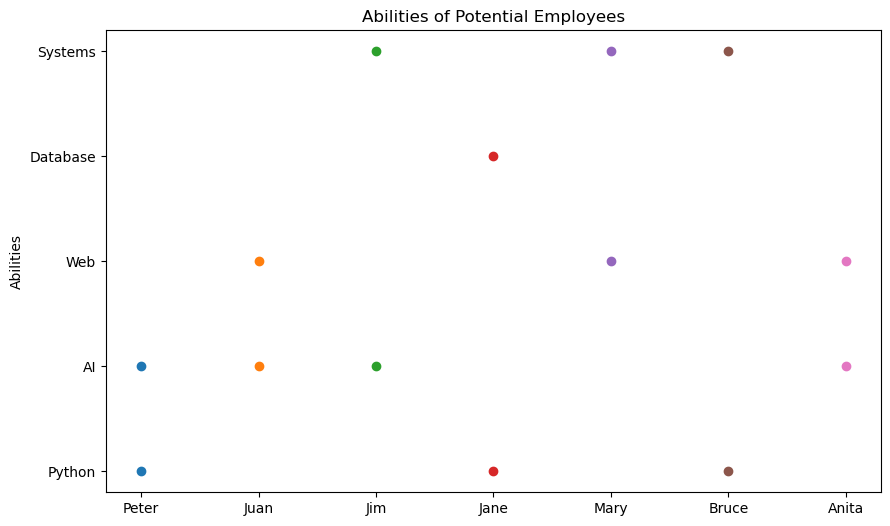

In [10]:
from matplotlib import pyplot as plt

# Names of potential employees.
names = ["Peter", "Juan", "Jim", "Jane", "Mary", "Bruce", "Anita"]

# Abilities of each potential employee.
abilities = {
    "Peter": ["Python", "AI"],
    "Juan": ["Web", "AI"],
    "Jim": ["AI", "Systems"],
    "Jane": ["Python", "Database"],
    "Mary": ["Web", "Systems"],
    "Bruce": ["Systems", "Python"],
    "Anita": ["Web", "AI"]
}

# Assigning numerical values to each ability for plotting purposes.
ability_values = {
    "Python": 1,
    "AI": 2,
    "Web": 3,
    "Database": 4,
    "Systems": 5
}

# Converting abilities to numerical values.
num_abilities = [[ability_values[ability] for ability in abilities[name]] for name in names]

# Preparing the plot.
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Abilities of Potential Employees")
ax.set_ylabel("Abilities")
ax.set_yticks(range(1, 6))
ax.set_yticklabels(["Python", "AI", "Web", "Database", "Systems"])
ax.set_xticks(range(len(names)))
ax.set_xticklabels(names)

# Plotting the abilities of each potential employee.
for i, employee_abilities in enumerate(num_abilities):
    ax.scatter([i] * len(employee_abilities), employee_abilities)

plt.show()

In [7]:
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
import ipywidgets as widgets

# The list of all 21 solutions for scenario 2.
solutions = [
    {'Python Programmer': 'Peter', 'AI Engineer 1': 'Jim', 'AI Engineer 2': 'Peter', 'Database Admin': 'Jane', 'Systems Engineer': 'Jim'},
    {'Python Programmer': 'Peter', 'AI Engineer 1': 'Jim', 'AI Engineer 2': 'Peter', 'Database Admin': 'Jane', 'Systems Engineer': 'Mary'},
    {'Python Programmer': 'Peter', 'AI Engineer 1': 'Jim', 'AI Engineer 2': 'Peter', 'Database Admin': 'Jane', 'Systems Engineer': 'Bruce'},
    {'Python Programmer': 'Peter', 'AI Engineer 1': 'Anita', 'AI Engineer 2': 'Peter', 'Database Admin': 'Jane', 'Systems Engineer': 'Jim'},
    {'Python Programmer': 'Peter', 'AI Engineer 1': 'Anita', 'AI Engineer 2': 'Peter', 'Database Admin': 'Jane', 'Systems Engineer': 'Mary'},
    {'Python Programmer': 'Peter', 'AI Engineer 1': 'Anita', 'AI Engineer 2': 'Peter', 'Database Admin': 'Jane', 'Systems Engineer': 'Bruce'},
    {'Python Programmer': 'Peter', 'AI Engineer 1': 'Anita', 'AI Engineer 2': 'Jim', 'Database Admin': 'Jane', 'Systems Engineer': 'Jim'},
    {'Python Programmer': 'Jane', 'AI Engineer 1': 'Jim', 'AI Engineer 2': 'Peter', 'Database Admin': 'Jane', 'Systems Engineer': 'Jim'},
    {'Python Programmer': 'Jane', 'AI Engineer 1': 'Jim', 'AI Engineer 2': 'Peter', 'Database Admin': 'Jane', 'Systems Engineer': 'Mary'},
    {'Python Programmer': 'Jane', 'AI Engineer 1': 'Jim', 'AI Engineer 2': 'Peter', 'Database Admin': 'Jane', 'Systems Engineer': 'Bruce'},
    {'Python Programmer': 'Jane', 'AI Engineer 1': 'Anita', 'AI Engineer 2': 'Peter', 'Database Admin': 'Jane', 'Systems Engineer': 'Jim'},
    {'Python Programmer': 'Jane', 'AI Engineer 1': 'Anita', 'AI Engineer 2': 'Peter', 'Database Admin': 'Jane', 'Systems Engineer': 'Mary'},
    {'Python Programmer': 'Jane', 'AI Engineer 1': 'Anita', 'AI Engineer 2': 'Peter', 'Database Admin': 'Jane', 'Systems Engineer': 'Bruce'},
    {'Python Programmer': 'Jane', 'AI Engineer 1': 'Anita', 'AI Engineer 2': 'Jim', 'Database Admin': 'Jane', 'Systems Engineer': 'Jim'},
    {'Python Programmer': 'Jane', 'AI Engineer 1': 'Anita', 'AI Engineer 2': 'Jim', 'Database Admin': 'Jane', 'Systems Engineer': 'Mary'},
    {'Python Programmer': 'Jane', 'AI Engineer 1': 'Anita', 'AI Engineer 2': 'Jim', 'Database Admin': 'Jane', 'Systems Engineer': 'Bruce'},
    {'Python Programmer': 'Bruce', 'AI Engineer 1': 'Jim', 'AI Engineer 2': 'Peter', 'Database Admin': 'Jane', 'Systems Engineer': 'Jim'},
    {'Python Programmer': 'Bruce', 'AI Engineer 1': 'Jim', 'AI Engineer 2': 'Peter', 'Database Admin': 'Jane', 'Systems Engineer': 'Bruce'},
    {'Python Programmer': 'Bruce', 'AI Engineer 1': 'Anita', 'AI Engineer 2': 'Peter', 'Database Admin': 'Jane', 'Systems Engineer': 'Bruce'},
    {'Python Programmer': 'Bruce', 'AI Engineer 1': 'Anita', 'AI Engineer 2': 'Jim', 'Database Admin': 'Jane', 'Systems Engineer': 'Jim'},
    {'Python Programmer': 'Bruce', 'AI Engineer 1': 'Anita', 'AI Engineer 2': 'Jim', 'Database Admin': 'Jane', 'Systems Engineer': 'Bruce'}
]

# Names of potential employees and their abilities.
names = ["Peter", "Jim", "Jane", "Mary", "Bruce", "Anita"]

abilities = {
    "Peter": ["Python", "AI"],
    "Jim": ["AI", "Systems"],
    "Jane": ["Python", "Database"],
    "Mary": ["Web", "Systems"],
    "Bruce": ["Systems", "Python"],
    "Anita": ["Web", "AI"]
}

# Assigning numerical values to each ability for plotting purposes.
ability_values = {
    "Python": 1,
    "AI": 2,
    "Web": 3,
    "Database": 4,
    "Systems": 5
}

# Function to plot a given solution.
def plot_solution(solution_number):
    solution = solutions[solution_number - 1]
    fig, ax = plt.subplots(figsize=(12, 6)) 
    ax.set_title(f"Solution {solution_number} for Scenario 2")

    # Defines the positions.
    positions = ['Python Programmer', 'AI Engineer 1', 'AI Engineer 2', 'Database Admin', 'Systems Engineer']
    position_values = {position: idx + 1 for idx, position in enumerate(positions)}

    # Sets the x-axis with all candidate names.
    ax.set_xticks(range(1, len(names) + 1))
    ax.set_xticklabels(names, rotation=45, ha='right') 
    ax.set_xlim(0.5, len(names) + 0.5)  # Sets limits to show all names.
    
    # Sets the y-axis with the positions.
    ax.set_yticks(range(1, len(positions) + 1))
    ax.set_yticklabels(positions)
    ax.grid(True)

    # Marks the positions for the selected solution.
    for role, employee in solution.items():
        employee_index = names.index(employee) + 1  # +1 for 1-based indexing
        position_index = position_values[role]
        ax.scatter(employee_index, position_index, s=100, color='black')

    plt.show()

# Interactive widget to choose the solution number.
interact(plot_solution, solution_number=IntSlider(min=1, max=21, step=1, value=1))

interactive(children=(IntSlider(value=1, description='solution_number', max=21, min=1), Output()), _dom_classe…

<function __main__.plot_solution(solution_number)>